In [1]:
import numpy as np
from qiskit import *
%matplotlib inline
from math import pi, sqrt
import random
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import random_state
#pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

In [2]:
backend = Aer.get_backend('statevector_simulator')
def getBloch(quantumC):
    return visualization.plot_bloch_multivector(execute(quantumC, backend).result().get_statevector())
        

In [3]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
    return newState

In [4]:
def getMeasure(quantumC, n):
    measures = []
    for i in range(0, n):
        outcome = execute(quantumC, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
    return measures

In [5]:
def makeCirc(n, state):
    initState = state
    print(initState)
    qr = QuantumRegister(n)
    qc = ClassicalRegister(n)
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(initState)
    circ.initialize(initializedState, qr)
    return circ

In [6]:
def getHisto(n, circ):
    qasm_sim = Aer.get_backend('qasm_simulator')
    shots = n
    qobj = assemble(circ, shots=shots)
    results = qasm_sim.run(qobj).result()
    counts = results.get_counts()
    return counts

In [32]:
def teleportIt():
    qr = QuantumRegister(3)
    crx, crz = ClassicalRegister(1), ClassicalRegister(1)
    circ = QuantumCircuit(qr, crz, crx)
    
    ####random initial state for Alice's Personal Qubit
    w = random_state(1)
    circ.append(extensions.Initialize(w), [0])
    ##rand init state
    
    circ.barrier()
    circ.h(1)
    circ.cx(1,2)
    circ.barrier()
    
    circ.cx(0, 1)
    circ.h(0)
    circ.barrier()
    circ.measure(range(0, 2), range(0, 2))
    
    #alice sends qubit
    circ.barrier()
    circ.x(2).c_if(crx, 1)
    circ.z(2).c_if(crz, 1)
    return circ, w

In [40]:
circ, w = teleportIt()

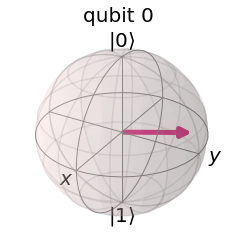

In [41]:
visualization.plot_bloch_multivector(w)

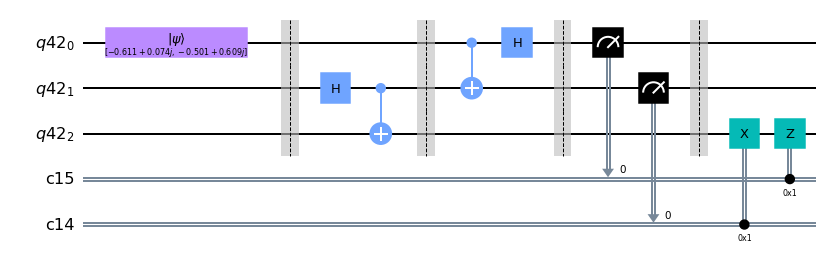

In [35]:
circ.draw('mpl')

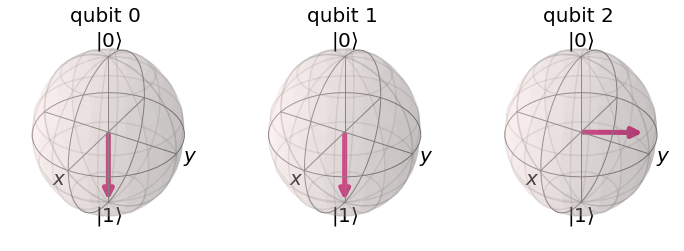

In [42]:
getBloch(circ) #no cloning theorem has not been violated